In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
import os
import scipy.stats as stats
from scipy.optimize import curve_fit

def extract_data(directory):
    data_dict ={}
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as csvfile:
            csv_reader = csv.reader(csvfile)
            
            voltage = []
            current = []
            
            for column in csv_reader:
                voltage.append(column[0])
                current.append(column[1])
                            
            data_dict[filename] = (voltage, current)
    return data_dict
    
path = 'data\good_data'
data_dict = extract_data(path)

prefix_count = {}

for filename, data in data_dict.items():
    voltage, current = data
    
    abridged_filename = '_'.join(filename.split('_')[:3])
    #print(f'Filename: {filename}, Abridged Filename: {abridged_filename}')
    
    prefix_count[abridged_filename] = prefix_count.get(abridged_filename, 0) + 1
    suffix = prefix_count[abridged_filename]
    
    voltage_variable_name = f'{abridged_filename}_{suffix}_voltage'
    current_variable_name = f'{abridged_filename}_{suffix}_current'
    
    globals()[voltage_variable_name] = voltage 
    globals()[current_variable_name] = current    

#dir()

def lin_func(I, slope, intercept):
    return slope * I + intercept

Pressure: $525 \text{ mTorr} \pm 5 \text{ mTorr}$

Will have to collect more data before performing a final analysis. These are just initial calculations. 

### Data Analysis Questions 

EXERCISE 1 Explain in your own words why there is an exponential form for the dependence of ion or electron current on voltage when for ions V_B ≥ V_P and for electrons V_B ≤ V_P.

* When an electrode has a different potential than the surrounding plasma, the electrons and ions in the plasma will configure themselves around it in order to limit the effect of this potential difference on the bulk plasma. In the case of a negatively biased electrode, electrons will be repeled, and thus the electron density will decrease. Additionally, the ions will be attracted to, and accelerate towards the electrode, decreasing the ion density in the plasma. When this happens, a positve sheath forms around the electrode since the ion density will exceed the electron desnity at the sheaths edge. In order for the ion density to decrease more slowly than the electron density, the ions must approach the sheath with a speed exceeding the Bohm velocity. The ions acheive this speed by picking up kinetic energy as they move through the plasma. *

* In other words, when the bias voltage is greater than the plasma potential, the ions will accelerate towards the electrode, and collide with its curface, resulting in the flow of ion current onto the electrode. As the voltage increases, the number of ions contribuing to the ion current will reach the total number of avalvible ions, and thus the increase of the ion current will decrease exponentially.*


EXERCISE 2 Use equations 1 and 5 from Merlino to write down an expression for the total current measured when the bias potential is less than the plasma potential: V_B < V_P.


$I_{tot} = I_{e}(V_B) + I_{i}(V_B) = I_{es}exp[-e(V_P - V_B)/kT_e] - I_{is} $


EXERCISE 3 Solve this equation for the electron current I_e in terms of the ion saturation current I_is and the bias potential V_B.




EXERCISE 4 Write down an equation for the natural log of the electron current.

$ ln(l_{e}) = \frac{-e(V_P - V_B)}{kT_e}ln(V_{es}) $

EXERCISE 5 Find an expression for the uncertainty of the natural log of the current  in terms of the uncertainty of the current. (Note: In the instrumentation portion of this experiment you should find information that lets you estimate the instrumental uncertainty in the current measurements. You can and should repeat measurements to empirically identify the current uncertainties.)

$\sigma_{ln(I_{e})} = \frac{\sigma_{I_{e}}}{I_{e}}$

EXERCISE 6 Write down an expression for the slope of a plot of the natural log of electron current I_e versus bias potential.

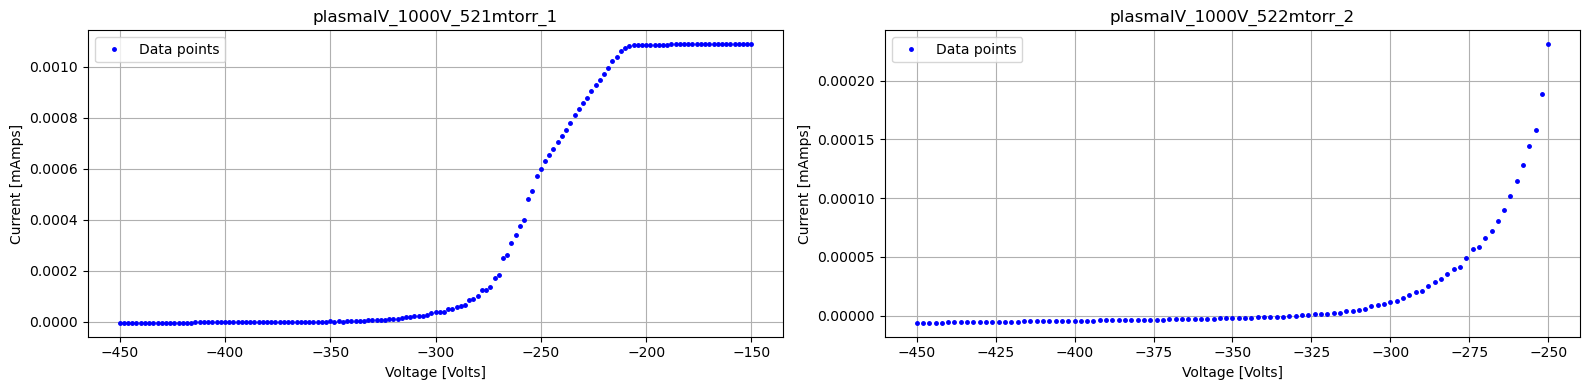

In [2]:
# 1000 Volts

data_sets1 = [('plasmaIV_1000V_521mtorr_1_current', 'plasmaIV_1000V_521mtorr_1_voltage', 'plasmaIV_1000V_521mtorr_1'),
              ('plasmaIV_1000V_522mtorr_1_current', 'plasmaIV_1000V_522mtorr_1_voltage', 'plasmaIV_1000V_522mtorr_2')]

#sigma_current1 = 1.5e-7*np.ones(100)

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets1):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    slope, intercept, _, _, std_err = stats.linregress(I, V)
    
    #popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current1, absolute_sigma=True)
    #slope, intercept = popt

    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    #axs[i].errorbar(V, I, yerr=sigma_current1, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].errorbar(V, I, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()

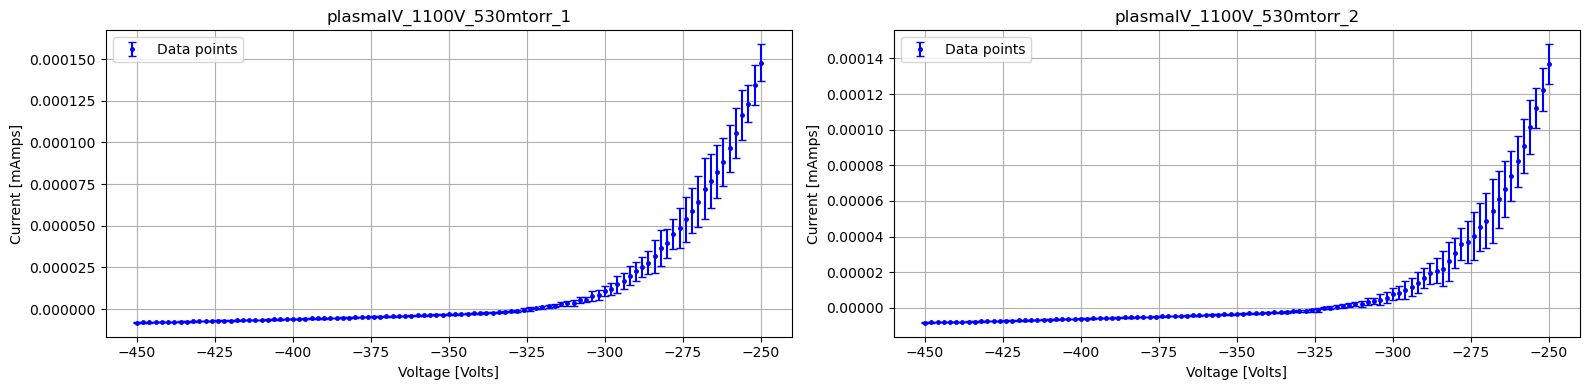

In [55]:
# 1100 Volts

data_sets2 = [('plasmaIV_1100V_530mtorr_1_current', 'plasmaIV_1100V_530mtorr_1_voltage', 'plasmaIV_1100V_530mtorr_1'),
              ('plasmaIV_1100V_530mtorr_2_current', 'plasmaIV_1100V_530mtorr_2_voltage', 'plasmaIV_1100V_530mtorr_2')]

sigma_current2 = abs(np.asarray(plasmaIV_1100V_530mtorr_1_current, dtype=np.float64) - np.asarray(plasmaIV_1100V_530mtorr_2_current, dtype=np.float64))

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets2):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    #slope, intercept, _, _, std_err = stats.linregress(I, V)
    
    popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current2, absolute_sigma=True)
    slope, intercept = popt

    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(V, I, yerr=sigma_current2, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()

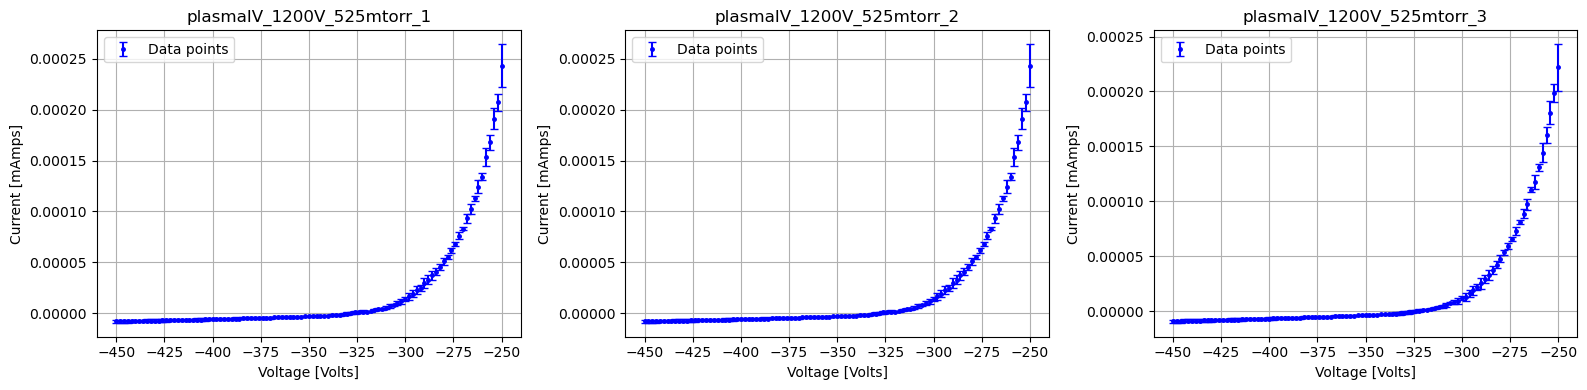

In [56]:
# 1200 Volts

data_sets3 = [('plasmaIV_1200V_525mtorr_1_current','plasmaIV_1200V_525mtorr_1_voltage', 'plasmaIV_1200V_525mtorr_1'), 
             ('plasmaIV_1200V_525mtorr_2_current', 'plasmaIV_1200V_525mtorr_2_voltage', 'plasmaIV_1200V_525mtorr_2'),
             ('plasmaIV_1200V_525mtorr_3_current', 'plasmaIV_1200V_525mtorr_3_voltage', 'plasmaIV_1200V_525mtorr_3')]

sigma_current3 = abs(np.asarray(plasmaIV_1200V_525mtorr_2_current, dtype=np.float64) - np.asarray(plasmaIV_1200V_525mtorr_3_current, dtype=np.float64))

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets3):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    #slope, intercept, _, _, std_err = stats.linregress(I, V)
    
    popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current3, absolute_sigma=True)
    slope, intercept = popt

    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(V, I, yerr=sigma_current3, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()

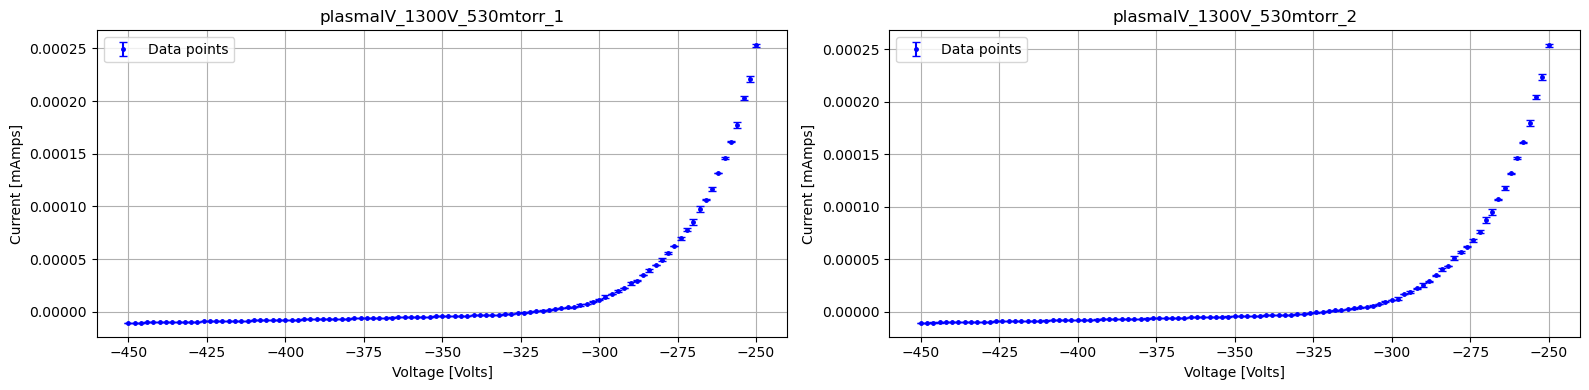

In [57]:
# 1300 Volts

data_sets4 = [('plasmaIV_1300V_530mtorr_1_current', 'plasmaIV_1300V_530mtorr_1_voltage', 'plasmaIV_1300V_530mtorr_1'),
              ('plasmaIV_1300V_530mtorr_2_current', 'plasmaIV_1300V_530mtorr_2_voltage', 'plasmaIV_1300V_530mtorr_2')]

sigma_current4 = abs(np.asarray(plasmaIV_1300V_530mtorr_1_current, dtype=np.float64) - np.asarray(plasmaIV_1300V_530mtorr_2_current, dtype=np.float64))


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets4):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    #slope, intercept, _, _, std_err = stats.linregress(I, V)
    
    popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current4, absolute_sigma=True)
    slope, intercept = popt

    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(V, I, yerr=sigma_current4, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()

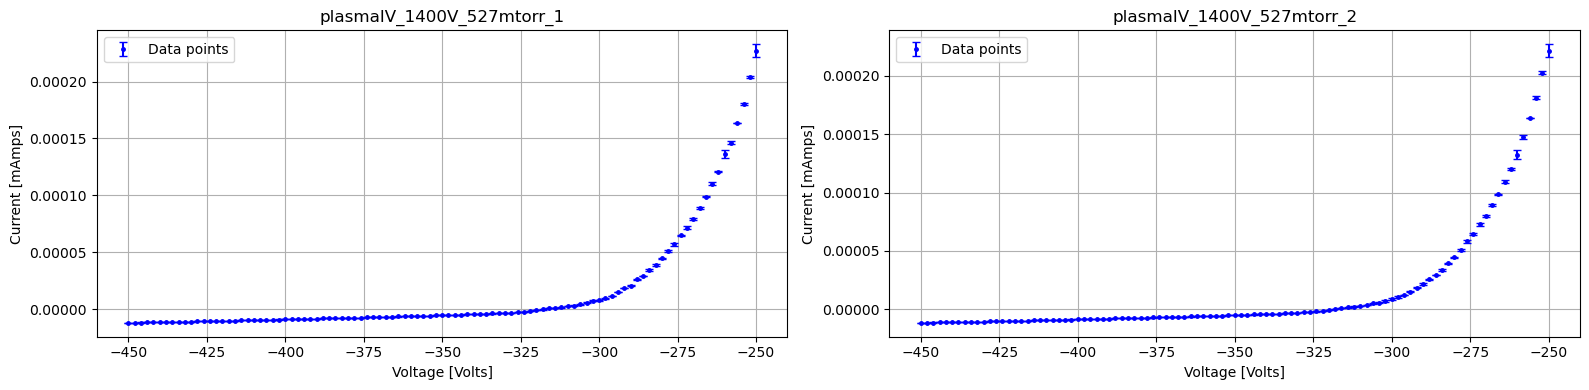

In [58]:
# 1400 Volts

data_sets5 = [('plasmaIV_1400V_527mtorr_1_current', 'plasmaIV_1400V_527mtorr_1_voltage', 'plasmaIV_1400V_527mtorr_1'),
              ('plasmaIV_1400V_527mtorr_2_current', 'plasmaIV_1400V_527mtorr_2_voltage', 'plasmaIV_1400V_527mtorr_2')]

sigma_current5 = abs(np.asarray(plasmaIV_1400V_527mtorr_1_current, dtype=np.float64) - np.asarray(plasmaIV_1400V_527mtorr_2_current, dtype=np.float64))

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets5):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    #slope, intercept, _, _, std_err = stats.linregress(I, V)
    
    popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current5, absolute_sigma=True)
    slope, intercept = popt

    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(V, I, yerr=sigma_current5, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()

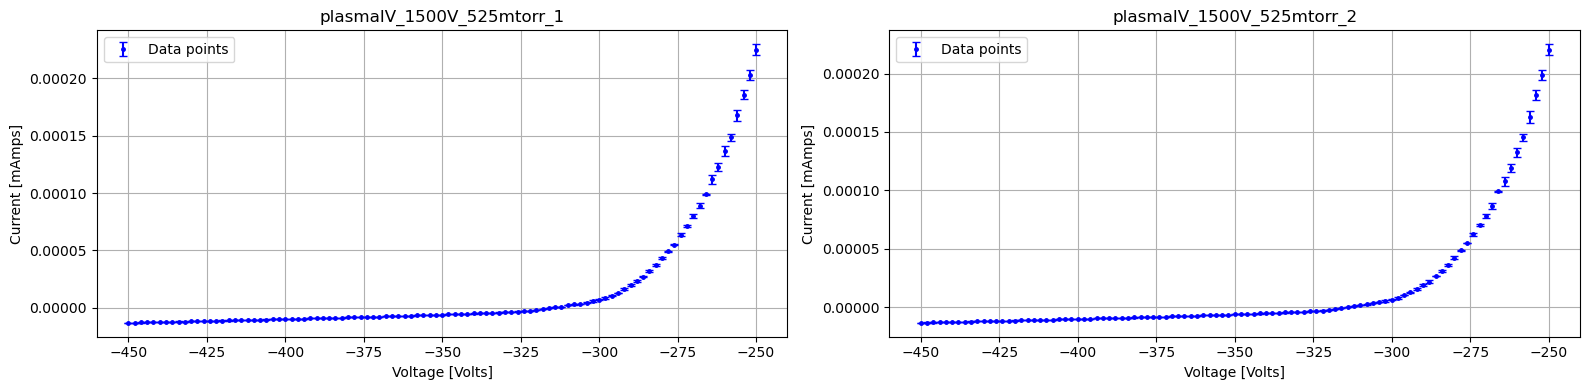

In [45]:
# 1500 Volts

data_sets6 = [('plasmaIV_1500V_525mtorr_1_current', 'plasmaIV_1500V_525mtorr_1_voltage', 'plasmaIV_1500V_525mtorr_1'),
               ('plasmaIV_1500V_525mtorr_2_current', 'plasmaIV_1500V_525mtorr_2_voltage', 'plasmaIV_1500V_525mtorr_2')]

sigma_current6 = abs(np.asarray(plasmaIV_1500V_525mtorr_1_current, dtype=np.float64) - np.asarray(plasmaIV_1500V_525mtorr_2_current, dtype=np.float64))
#print(sigma_current6)

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets6):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    #slope, intercept, _, _, std_err = stats.linregress(I, V, sigma=sigma_current6)
    
    popt, pcov = curve_fit(linear_function, I, V, sigma=sigma_current6, absolute_sigma=True)
    slope, intercept = popt
    
    #axs[i].plot(I, linear_function(I, slope, intercept), 'r', label='Fitted line')
    #axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(V, I, yerr=sigma_current6, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Voltage [Volts]')
    axs[i].set_ylabel('Current [mAmps]')
    axs[i].set_title(f'{title}')
    axs[i].grid(True)
    axs[i].legend()

    #print(f"Linear fit for {title}: V = ({slope:.3f} +/- {std_err:.3f}) I + {intercept:.3f}")

plt.tight_layout()
plt.show()